# **CS20B1044 Pattern Recognition Assignment 4**

In [160]:
# This assignment is done by CS20B1044 Avinash R Changrani

# importing the libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import cvxopt
import cv2
cvxopt.solvers.options['show_progress']=False

1. **Train a single perceptron and SVM to learn an AND gate with two inputs x1 and x2. Assume that all
the weights of the perceptron are initialized as 0. Show the calculation for each step and also draw the decision
boundary for each updation.**

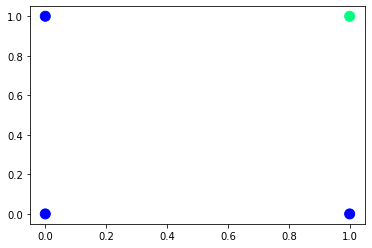

In [161]:
# initializing the input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

points = X

# plot the input data points with their labels 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='winter')
plt.show()

## **Perceptron Learning Algorithm**

In [162]:
# augmenting the input data with a column of ones
X = np.hstack((np.ones((X.shape[0], 1)), X))

# initializing the weights with random values
#W = np.random.randn(3)

# initializing the weights with zeroes
W = np.zeros(3)

# change zeroes to -1
Y[Y == 0] = -1

# negate the features for the class -1
X[Y == -1] = -X[Y == -1]

# print X, Y and W
print("X = ", X)
print("Y = ", Y)
print("W = ", W)

X =  [[-1. -0. -0.]
 [-1. -0. -1.]
 [-1. -1. -0.]
 [ 1.  1.  1.]]
Y =  [-1 -1 -1  1]
W =  [0. 0. 0.]


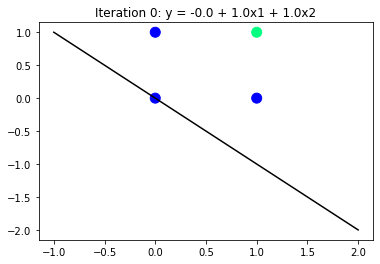

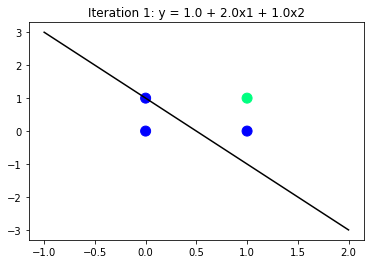

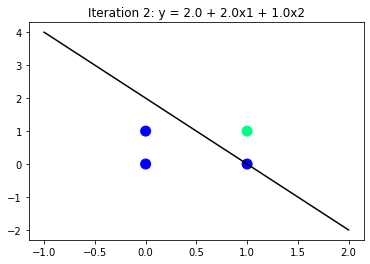

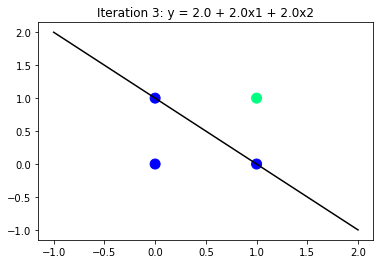

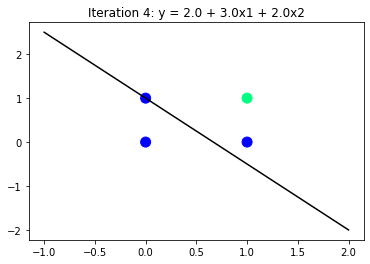

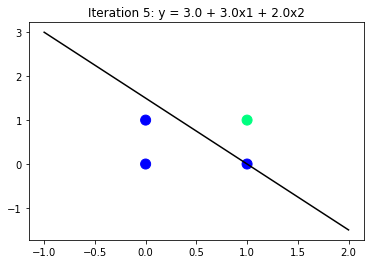

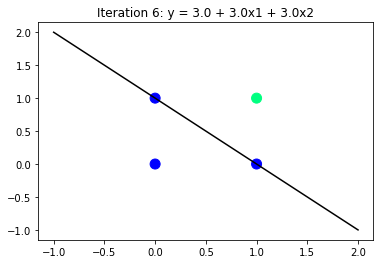

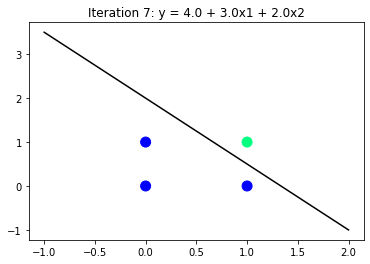

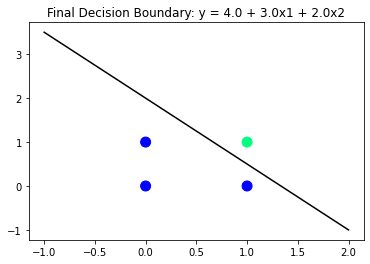

In [163]:
# define the learning rate
lr = 1

# train the perceptron until all the points are correctly classified and plot the decision boundary and the data points after each iteration
k = 0
while True:
    # initialize the count of correctly classified points
    count = 0
    # for each point
    for i in range(X.shape[0]):
        # if the point is correctly classified
        if np.dot(W.T, X[i]) > 0:
            # increment the count
            count += 1
        # if the point is incorrectly classified
        else:
            # update the weights
            W += lr * X[i]
    # if all the points are correctly classified
    if count == X.shape[0]:
        # break the loop
        break
    # plot the decision boundary
    x = np.linspace(-1, 2, 100)
    y = -(W[0] + W[1] * x) / W[2]
    plt.plot(x, y, 'k-')
    # plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
    plt.title("Iteration " + str(k) + ": y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
    plt.show()
    k += 1

# plot the final decision boundary
x = np.linspace(-1, 2, 100)
y = -(W[0] + W[1] * x) / W[2]
plt.plot(x, y, 'k-')
# plot the data points
plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
plt.title("Final Decision Boundary: y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
plt.show()

Since we will solve this optimization problem using the CVXOPT library in python we will need to match the solver's API which, according to the documentation is of the form:
\begin{aligned}
    & \min \frac{1}{2} x^TPx + q^Tx
    \\
     s.t. \ & \ Gx \leq h 
    \\
    & \ Ax = b
\end{aligned}

Our Problem in SVM is to find the hyperplane that maximizes the margin between the two classes.
\begin{aligned}
    & \min \frac{1}{2} ||w||^2
    \\
     s.t. \ & \ y_i(w^Tx_i + b) \geq 1 \ \forall i
\end{aligned}

We get the loss function as:
\begin{aligned}
J(\boldsymbol{w}, b, \boldsymbol{\alpha}) &= (1/2) \|\boldsymbol{w}\|^2 - \sum_{i=1}^N \alpha_i [y_i (\boldsymbol{w}^T \boldsymbol{x}_i + b) - 1] \\
&= (1/2) \boldsymbol{w}^T\boldsymbol{w} - \sum_{i=1}^N \alpha_i y_i (\boldsymbol{w}^T \boldsymbol{x}_i + b) + \sum_{i=1}^N\alpha_i 
\end{aligned}

\begin{aligned} 
&\partial J(\boldsymbol{w}, b, \boldsymbol{\alpha})/\partial \boldsymbol{w}  0 \text{, which yields } \boldsymbol{w} = \sum_{i=1}^N \alpha_i y_i \boldsymbol{x}_i \\ 
&\partial J(\boldsymbol{w}, b, \boldsymbol{\alpha})/ \partial b = 0 \text{, which yields } \sum_{i=1}^N \alpha_i y_i = 0  \end{aligned}

\begin{aligned}
J(\boldsymbol{w}, b, \boldsymbol{\alpha}) &= (1/2) \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \boldsymbol{x}_i^T \boldsymbol{x}_j - \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \boldsymbol{x}_i^T \boldsymbol{x}_j + b \sum_{i=1}^N \alpha_i y_i + \sum_{i=1}^N \alpha_i \\
&= -(1/2) \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \boldsymbol{x}_i^T \boldsymbol{x}_j + b \sum_{i=1}^N \alpha_i y_i + \sum_{i=1}^N \alpha_i 
\end{aligned}

Now, the optimization problem becomes:
\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^N \alpha_i -(1/2) \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \boldsymbol{x}_i^T \boldsymbol{x}_j  \\
\textrm{such that} \quad & (1) \; \sum_{i=1}^N \alpha_i y_i = 0 \\
& (2) \; \alpha_i \geq 0 \; \forall i
\end{aligned}

Let H be a matrix such that $H_{i,j} = y^{(i)}y^{(j)} <x^{(i)} x^{(j)}>$, then the optimization becomes:
\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. & \ \alpha_i \geq 0 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}

We convert the sums into vector form and multiply both the objective and the constraint by −1 which turns this into a minimization problem and reverses the inequality
\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
    & s.t. \ - \alpha_i \leq 0 
    \\
    & s.t. \ y^T \alpha = 0 
\end{aligned}

We are now ready to convert our numpy arrays into the cvxopt format, using the same notation as in the documentation this gives

- $P:=H$ a matrix of size m×m 
- $q:=−1$ a vector of size m×1 
- $G:=$ −diag[1] a diagonal matrix of -1s of size m×m 
- $h:=0$ a vector of zeros of size m×1 
- $A:=y$ the label vector of size m×1 
- $b:=0$ a scalar

In [164]:
# initializing the input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

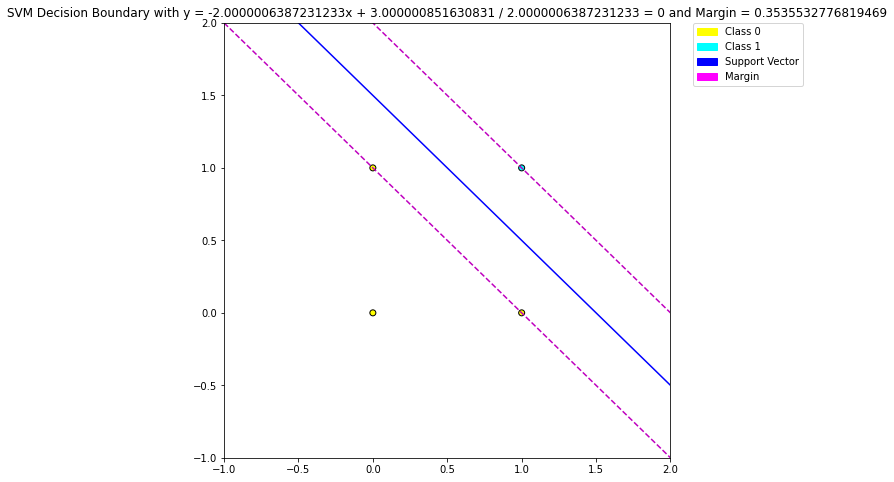

In [165]:
# userdefined class self for linearly separable data points plot the decision boundary and the data points after each iteration

class SVM:
    def __init__(self, C=None):
        self.C = C
        if C is not None: 
            self.C = float(C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Define the kernel matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])

        # Define the quadratic programming problem
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        y = y.astype(np.double)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G_max = np.diag(np.ones(n_samples) * -1)
            G_min = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((G_max, G_min)))
            h_max = cvxopt.matrix(np.zeros(n_samples))
            h_min = cvxopt.matrix(np.ones(n_samples) * self.C)
            h = cvxopt.matrix(np.hstack((h_max, h_min)))

        # Solve the quadratic programming problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Extract the Lagrange multipliers
        a = np.ravel(solution['x'])
        sv_indices = a > 1e-5
        ind = np.arange(len(a))[sv_indices]
        # Find the support vectors
        self.a = a[sv_indices]
        self.support_vectors = X[sv_indices]
        self.support_vector_labels = y[sv_indices]
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.support_vector_labels[n]
            self.b -= np.sum(self.a * self.support_vector_labels * K[ind[n],sv_indices])
        self.b /= len(self.a)

        # Calculate the weight vector
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.support_vector_labels[n] * self.support_vectors[n]


    def predict(self, X):
        # Compute the output of the SVM
        result = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for j in range(self.support_vectors.shape[0]):
                s += self.a[j] * self.support_vector_labels[j] * np.dot(X[i], self.support_vectors[j])
            result[i] = s
        result += self.b
        return np.sign(result)

    # Plot the decision boundary,data points and support vectors
    def plot_svm(self, X, y):
        # Define the x and y scale
        x_min = min(X[:,0]) - 1
        x_max = max(X[:,0]) + 1
        y_min = min(X[:,1]) - 1
        y_max = max(X[:,1]) + 1
        xx = np.linspace(x_min, x_max)
        a = -self.w[0]/self.w[1]
        yy = a*xx - (self.b)/self.w[1]
        margin = 1 / np.sqrt(np.sum(self.w**2))
        yy_neg = yy - np.sqrt(1 + a**2) * margin
        yy_pos = yy + np.sqrt(1 + a**2) * margin
        plt.figure(figsize=(8, 8))
        plt.plot(xx, yy, "b-")
        plt.plot(xx, yy_neg, "m--")
        plt.plot(xx, yy_pos, "m--")
        colors = ["yellow", "cyan"]
        plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
        # eqn of the line is w0*x + w1*y + b = 0
        # y = (-w0*x - b)/w1
        plt.title("SVM Decision Boundary with y = " + str(-self.w[0]) + "x + " + str(-self.b) + " / " + str(self.w[1]) + " = 0 and Margin = " + str(margin)) 
        # Define the colors and labels for the legend box
        labels = ["Class 0", "Class 1", "Support Vector", "Margin"]
        colors = ["yellow", "cyan", "blue", "magenta"]
        # Create the legend box
        patches = [mpatches.Patch(color=c, label=l) for c, l in zip(colors, labels)]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.show()

# Create the SVM model
svm = SVM()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1]).T
Y[Y == 0] = -1
svm.fit(X, Y)
svm.plot_svm(X, Y)

2. **Train a single perceptron and SVM to learn the two classes in the following table.**

<div align="center">

|x1|x2| ω|
| :---        |    :----:   |          ---: |
|2 |2 |1|
|-1 |-3| 0|
|-1 |2| 1|
|0 |-1| 0|
|1 |3| 1|
|-1 |-2| 0|
|1 |-2| 0|
|-1 |-1| 1|

</div>


**where** $\mathbf{x_1}$ **and** $\mathbf{x_2}$ **are the inputs and ω is the target class. Assume that all the weights of the perceptron are initialized as 0 with learning rate 0.01 and 0.5 separately. Also, tabulate the number of iterations required to converge the perception algorithm with these two learning rates.**

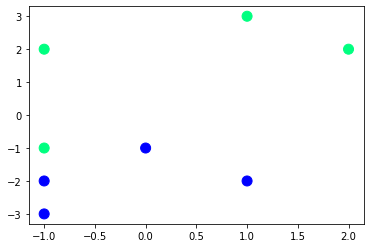

In [166]:
X = np.array([[2,2], [-1, -3], [-1,2], [0,-1], [1,3], [-1, -2], [1,-2], [-1,-1]])

Y = np.array([1, -1, 1, -1, 1, -1, -1, 1])

points = X

# plot the input data points with their labels
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='winter')
plt.show()

## **Perceptron Learning Algorithm**

In [167]:
# augmenting the input data with a column of ones
X = np.hstack((np.ones((X.shape[0], 1)), X))

# initialize the weights with zeroes
W = np.zeros(X.shape[1])

# negate the features for the class -1
X[Y == -1] = -X[Y == -1]

print("X = ", X)
print("Y = ", Y)
print("W = ", W)

X =  [[ 1.  2.  2.]
 [-1.  1.  3.]
 [ 1. -1.  2.]
 [-1. -0.  1.]
 [ 1.  1.  3.]
 [-1.  1.  2.]
 [-1. -1.  2.]
 [ 1. -1. -1.]]
Y =  [ 1 -1  1 -1  1 -1 -1  1]
W =  [0. 0. 0.]


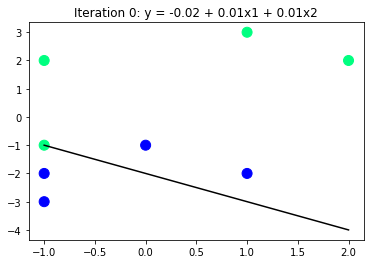

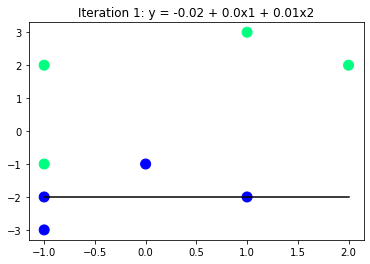

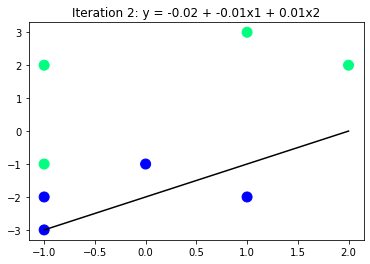

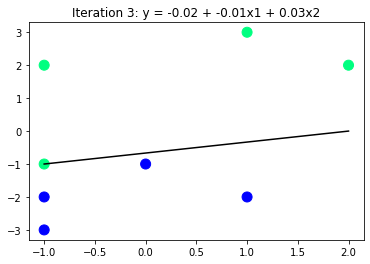

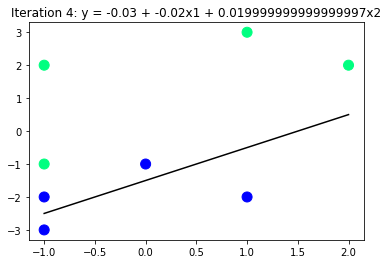

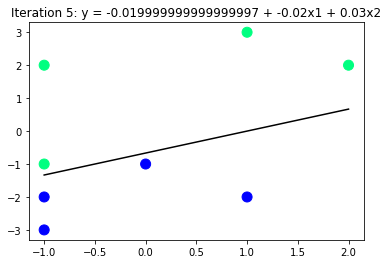

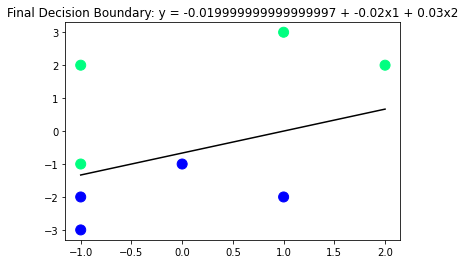

In [168]:
# define the learning rate
lr_1 = 0.01
lr_2 = 0.5

# Learning rate = 0.01
# train the perceptron until all the points are correctly classified and plot the decision boundary and the data points after each iteration
k = 0
while True:
    # initialize the count of correctly classified points
    count = 0
    # for each point
    for i in range(X.shape[0]):
        # if the point is correctly classified
        if np.dot(W.T, X[i]) > 0:
            # increment the count
            count += 1
        # if the point is incorrectly classified
        else:
            # update the weights
            W += lr_1 * X[i]
    # if all the points are correctly classified
    if count == X.shape[0]:
        # break the loop
        break
    # plot the decision boundary
    x = np.linspace(-1, 2, 100)
    y = -(W[0] + W[1] * x) / W[2]
    plt.plot(x, y, 'k-')
    # plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
    plt.title("Iteration " + str(k) + ": y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
    plt.show()
    k += 1

# plot the final decision boundary
x = np.linspace(-1, 2, 100)
y = -(W[0] + W[1] * x) / W[2]
plt.plot(x, y, 'k-')
# plot the data points
plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
plt.title("Final Decision Boundary: y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
plt.show()

iterations_1 = k

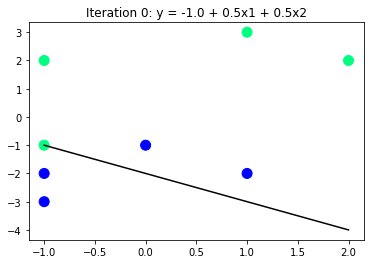

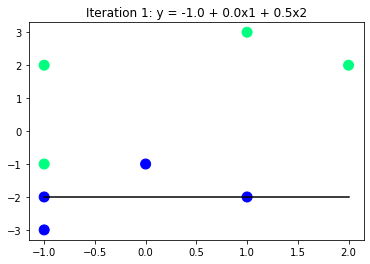

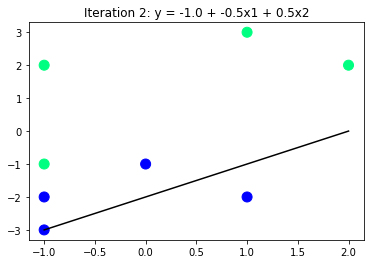

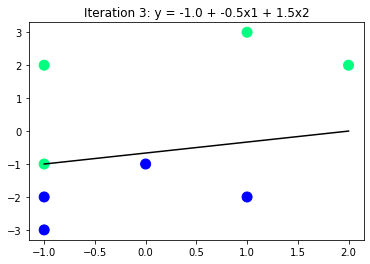

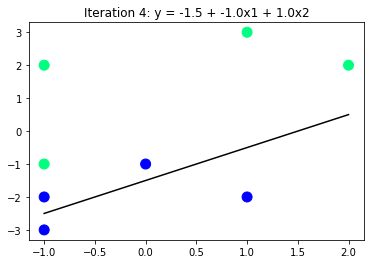

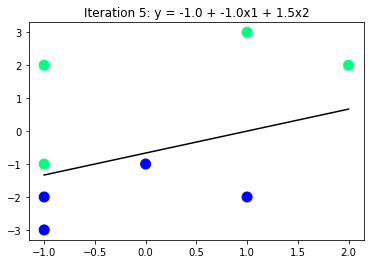

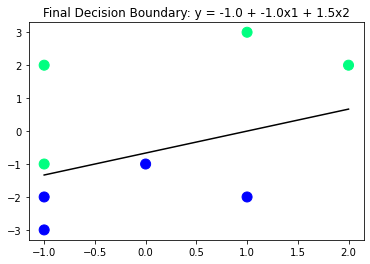

In [169]:
# initialize the weights with zeroes
W = np.zeros(X.shape[1])

# Learning rate = 0.5
# train the perceptron until all the points are correctly classified and plot the decision boundary and the data points after each iteration
k = 0
while True:
    # initialize the count of correctly classified points
    count = 0
    # for each point
    for i in range(X.shape[0]):
        # if the point is correctly classified
        if np.dot(W.T, X[i]) > 0:
            # increment the count
            count += 1
        # if the point is incorrectly classified
        else:
            # update the weights
            W += lr_2 * X[i]
    # if all the points are correctly classified
    if count == X.shape[0]:
        # break the loop
        break
    # plot the decision boundary
    x = np.linspace(-1, 2, 100)
    y = -(W[0] + W[1] * x) / W[2]
    plt.plot(x, y, 'k-')
    # plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
    plt.title("Iteration " + str(k) + ": y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
    plt.show()
    k += 1

# plot the final decision boundary
x = np.linspace(-1, 2, 100)
y = -(W[0] + W[1] * x) / W[2]
plt.plot(x, y, 'k-')
# plot the data points
plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
plt.title("Final Decision Boundary: y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
plt.show()

iterations_2 = k

In [170]:
# print the number of iterations for each learning rate
print("Number of iterations for learning rate 0.01: ", iterations_1)
print("Number of iterations for learning rate 0.5: ", iterations_2)

Number of iterations for learning rate 0.01:  6
Number of iterations for learning rate 0.5:  6


## **Support Vector Machine(SVM)**

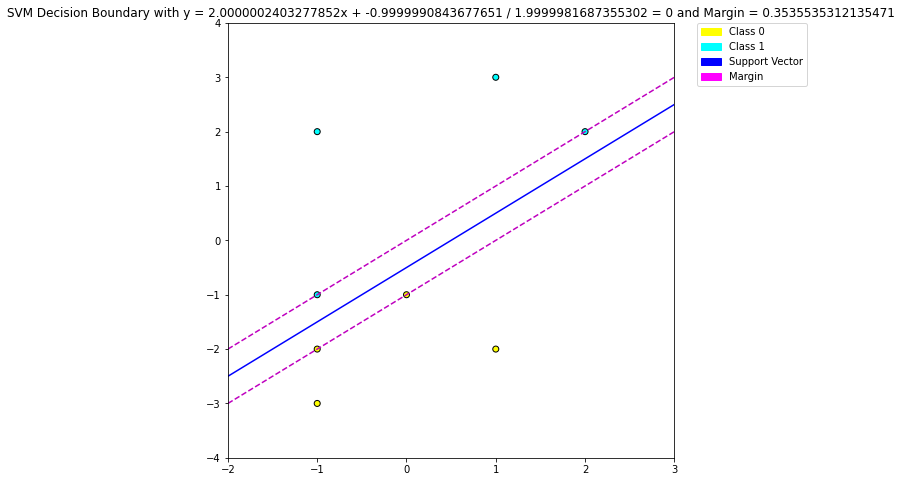

In [171]:
# use the SVM model to classify the points
X = np.array([[2,2], [-1, -3], [-1,2], [0,-1], [1,3], [-1, -2], [1,-2], [-1,-1]])

Y = np.array([1, -1, 1, -1, 1, -1, -1, 1]).T
Y[Y == 0] = -1

svm = SVM()
svm.fit(X, Y)
svm.plot_svm(X, Y)

3. **In the given I set of images from poly1.png to poly14.png, let poly1 to poly 7 belong to class 1 and poly 8 to poly 14 belong to class 2. Assume that all the weights of the perceptron are initialized as 0 with the learning rate of 0.01.**

- **Identify two discriminant features x1 and x2 for the two target classes ω={ω1, ω2}. Here, ω1 - class 1 and ω2 - class 2.**
- **Generate an input feature vector X for all the images mapping them to a corresponding target classes ωi where i $\in$ (1, 2).**
- **Train a single perceptron and SVM to learn the feature vector X mapping to ω.**
- **Plot and draw the final decision boundary separating the two classes.**

**[Note: Use poly.zip file in the attachments.]**

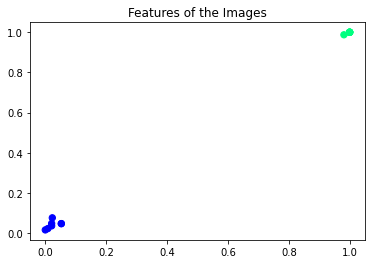

In [172]:
images = []
X = []
Y = []

for num in range(1,15):
    images.append(f'./poly/poly{num}.png')

for i in range(len(images)):
    img = cv2.imread(images[i])
    x1 = sum((255 > np.average(i) > 0) for i in img[0])/len(img[0])
    x2 = sum((255 > np.average(i[0]) > 0) for i in img)/len(img)
    X.append([x1, x2])
    Y.append(-1 if i < 7 else 1)

X = np.array(X)
Y = np.array(Y).T

points = X

# plot the data points
plt.scatter(points[:, 0], points[:, 1], c=Y, s=40, cmap='winter')
plt.title("Features of the Images")
plt.show()

## **Perceptron Learning Algorithm**

In [173]:
# augment the data points with ones
X = np.hstack((np.ones((X.shape[0], 1)), X))

# initialize the weights with zeroes
W = np.zeros(X.shape[1])

# define the learning rate
lr_1 = 0.01

# negate the features of the points with label -1
X[Y == -1] = -X[Y == -1]

print("X = ", X)
print("Y = ", Y)
print("W = ", W)

X =  [[-1.         -0.         -0.01552795]
 [-1.         -0.02304147 -0.07575758]
 [-1.         -0.05263158 -0.046875  ]
 [-1.         -0.05263158 -0.046875  ]
 [-1.         -0.02083333 -0.03571429]
 [-1.         -0.02083333 -0.04761905]
 [-1.         -0.00849858 -0.02232143]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          0.98122066  0.98734177]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]]
Y =  [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1]
W =  [0. 0. 0.]


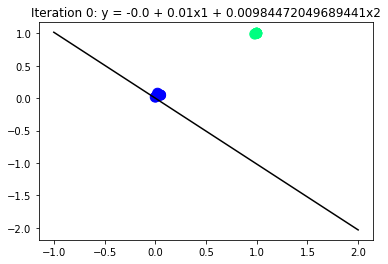

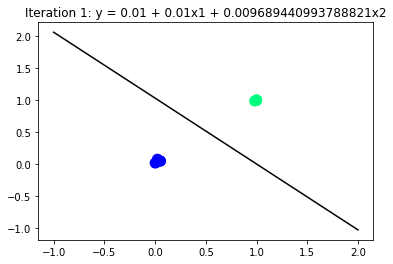

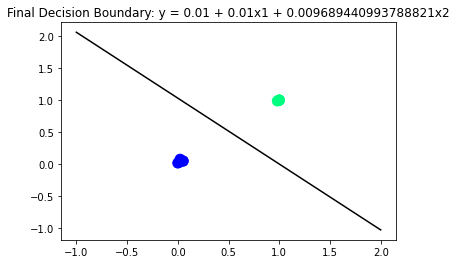

In [174]:
# train the perceptron until all the points are correctly classified and plot the decision boundary and the data points after each iteration
k = 0

while True:
    # initialize the count of correctly classified points
    count = 0
    # for each point
    for i in range(X.shape[0]):
        # if the point is correctly classified
        if np.dot(W.T, X[i]) > 0:
            # increment the count
            count += 1
        # if the point is incorrectly classified
        else:
            # update the weights
            W += lr_1 * X[i]
    # if all the points are correctly classified
    if count == X.shape[0]:
        # break the loop
        break
    # plot the decision boundary
    x = np.linspace(-1, 2, 100)
    y = -(W[0] + W[1] * x) / W[2]
    plt.plot(x, y, 'k-')
    # plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
    plt.title("Iteration " + str(k) + ": y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
    plt.show()
    k += 1

# plot the final decision boundary
x = np.linspace(-1, 2, 100)
y = -(W[0] + W[1] * x) / W[2]
plt.plot(x, y, 'k-')
# plot the data points
plt.scatter(points[:, 0], points[:, 1], c=Y, s=100, cmap='winter')
plt.title("Final Decision Boundary: y = " + str(-W[0]) + " + " + str(W[1]) + "x1 + " + str(W[2]) + "x2")
plt.show()

## **Support Vector Machine(SVM)**

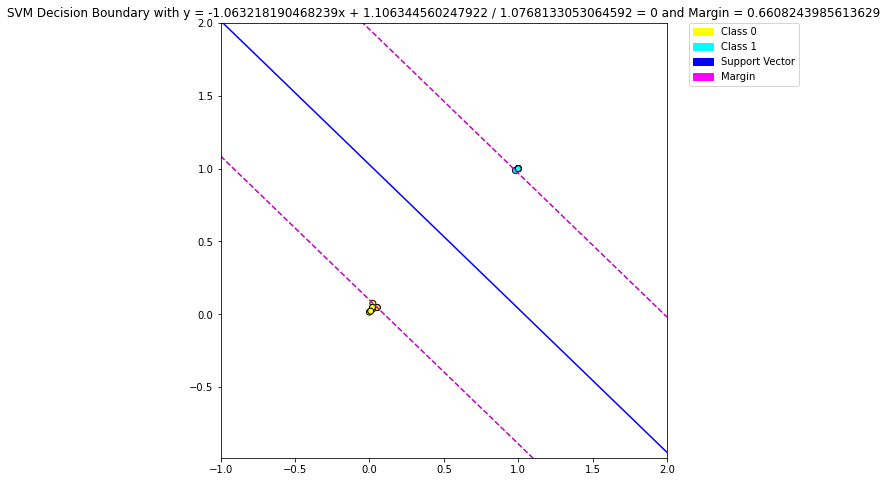

In [175]:
# use the SVM model to classify the points
X = points
svm = SVM()
svm.fit(X, Y)
svm.plot_svm(X, Y)

4. **From the iris dataset, choose the ’petal length’, ’sepal width’ for setosa, versicolor and virginica flowers. Learn a decision boundary for the two features using a single perceptron and SVM. Assume that all the weights of the perceptron are initialized as 0 with the learning rate of 0.01. Draw the decision boundary.**

**[Note: Use iris.csv file in the attachments.]**

In [176]:
df = pd.read_csv('./iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [177]:
# choose only the petal length and sepal width and the species features
df = df[['petal_length', 'sepal_width', 'species']]

df

,petal_length,sepal_width,species
0,1.4,3.5,Iris-setosa
1,1.4,3.0,Iris-setosa
2,1.3,3.2,Iris-setosa
3,1.5,3.1,Iris-setosa
4,1.4,3.6,Iris-setosa
...,...,...,...
145,5.2,3.0,Iris-virginica
146,5.0,2.5,Iris-virginica
147,5.2,3.0,Iris-virginica
148,5.4,3.4,Iris-virginica


In [178]:
# divide the datset based on species and drop species
df_setosa = df[df['species'] == 'Iris-setosa'].drop(['species'], axis=1)

df_versicolor = df[df['species'] == 'Iris-versicolor'].drop(['species'], axis=1)

df_virginica = df[df['species'] == 'Iris-virginica'].drop(['species'], axis=1)

df_versicolor.head()

,petal_length,sepal_width
50,4.7,3.2
51,4.5,3.2
52,4.9,3.1
53,4.0,2.3
54,4.6,2.8


In [179]:
# take only features from setosa and versicolor
X12 = np.vstack((df_setosa, df_versicolor))

Y12 = np.array([1] * 50 + [-1] * 50)

# take only features from versicolor and virginica
X23 = np.vstack((df_versicolor, df_virginica))

Y23 = np.array([1] * 50 + [-1] * 50)

# take only features from virginica and setosa
X31 = np.vstack((df_virginica, df_setosa))

Y31 = np.array([1] * 50 + [-1] * 50)

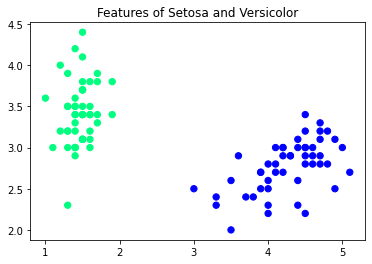

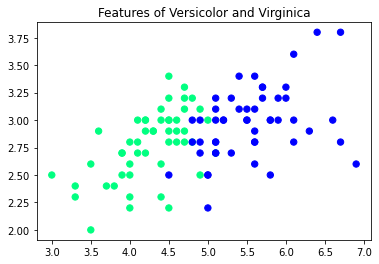

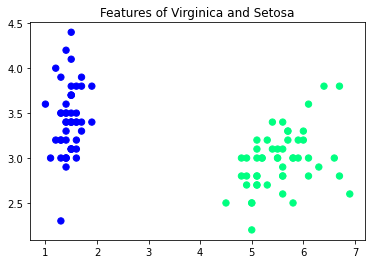

In [180]:
points12 = X12
points23 = X23
points31 = X31

# plot the data points
plt.scatter(points12[:, 0], points12[:, 1], c=Y12, s=40, cmap='winter')
plt.title("Features of Setosa and Versicolor")
plt.show()

# plot the data points
plt.scatter(points23[:, 0], points23[:, 1], c=Y23, s=40, cmap='winter')
plt.title("Features of Versicolor and Virginica")
plt.show()

# plot the data points
plt.scatter(points31[:, 0], points31[:, 1], c=Y31, s=40, cmap='winter')
plt.title("Features of Virginica and Setosa")
plt.show()

In [181]:
# augment the data points with ones
X12 = np.hstack((np.ones((X12.shape[0], 1)), X12))

X23 = np.hstack((np.ones((X23.shape[0], 1)), X23))

X31 = np.hstack((np.ones((X31.shape[0], 1)), X31))

# initialize the weights with zeroes
W12 = np.zeros(X12.shape[1])

W23 = np.zeros(X23.shape[1])

W31 = np.zeros(X31.shape[1])

# define the learning rate
lr = 0.01

# negate the features of the points with label -1
X12[Y12 == -1] = -X12[Y12 == -1]

X23[Y23 == -1] = -X23[Y23 == -1]

X31[Y31 == -1] = -X31[Y31 == -1]

## **Perceptron Learning Algorithm**

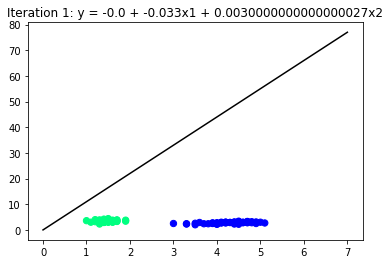

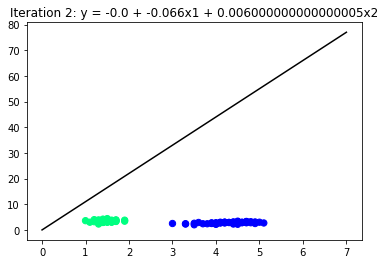

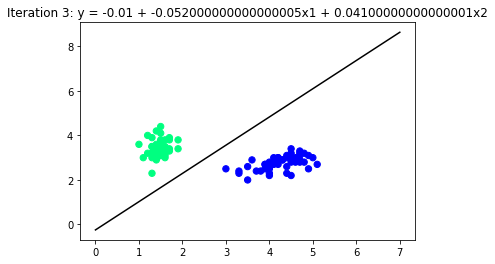

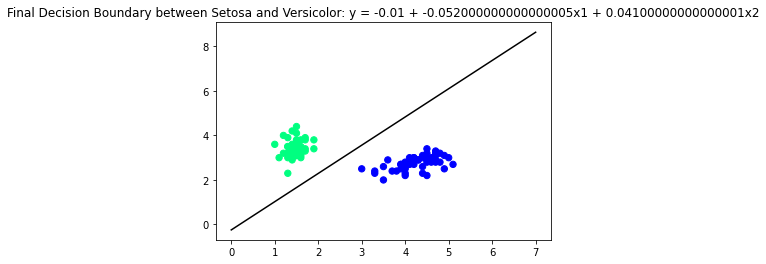

In [182]:
# train the perceptron until all the points are correctly classified and plot the decision boundary and the data points after each iteration
k = 1

while True:
    # initialize the count of correctly classified points
    count = 0
    # for each point
    for i in range(X12.shape[0]):
        # if the point is correctly classified
        if np.dot(W12.T, X12[i]) > 0:
            # increment the count
            count += 1
        # if the point is incorrectly classified
        else:
            # update the weights
            W12 += lr * X12[i]
    # if all the points are correctly classified
    if count == X12.shape[0]:
        # break the loop
        break
    # plot the decision boundary
    x = np.linspace(0, 7, 100)
    y = -(W12[0] + W12[1] * x) / W12[2]
    plt.plot(x, y, 'k-')
    # plot the data points
    plt.scatter(points12[:, 0], points12[:, 1], c=Y12, s=40, cmap='winter')
    plt.title("Iteration " + str(k) + ": y = " + str(-W12[0]) + " + " + str(W12[1]) + "x1 + " + str(W12[2]) + "x2")
    plt.show()
    k += 1

# plot the final decision boundary
x = np.linspace(0, 7, 100)
y = -(W12[0] + W12[1] * x) / W12[2]
plt.plot(x, y, 'k-')
# plot the data points
plt.scatter(points12[:, 0], points12[:, 1], c=Y12, s=40, cmap='winter')
plt.title("Final Decision Boundary between Setosa and Versicolor: y = " + str(-W12[0]) + " + " + str(W12[1]) + "x1 + " + str(W12[2]) + "x2")
plt.show()

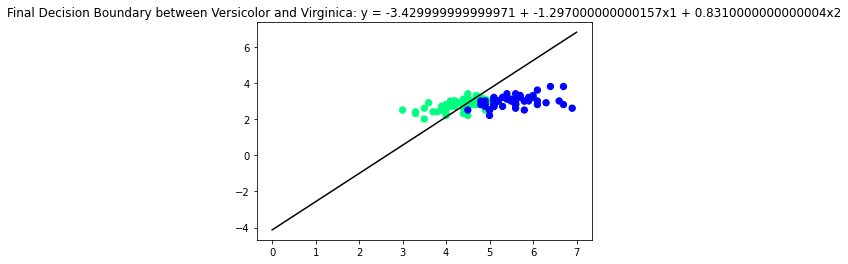

In [183]:
# train the perceptron until all the points are correctly classified and plot the decision boundary and the data points after each iteration
k = 1

while k < 5000:
    # initialize the count of correctly classified points
    count = 0
    # for each point
    for i in range(X23.shape[0]):
        # if the point is correctly classified
        if np.dot(W23.T, X23[i]) > 0:
            # increment the count
            count += 1
        # if the point is incorrectly classified
        else:
            # update the weights
            W23 += lr * X23[i]
    # if all the points are correctly classified
    if count == X23.shape[0]:
        # break the loop
        break
    # plot the decision boundary
    x = np.linspace(0, 7, 100)
    y = -(W23[0] + W23[1] * x) / W23[2]
    # plt.plot(x, y, 'k-')
    # # plot the data points
    # plt.scatter(points23[:, 0], points23[:, 1], c=Y23, s=40, cmap='winter')
    # plt.title("Iteration " + str(k) + ": y = " + str(-W23[0]) + " + " + str(W23[1]) + "x1 + " + str(W23[2]) + "x2")
    # plt.show()
    k += 1

# plot the final decision boundary
x = np.linspace(0, 7, 100)
y = -(W23[0] + W23[1] * x) / W23[2]
plt.plot(x, y, 'k-')
# plot the data points
plt.scatter(points23[:, 0], points23[:, 1], c=Y23, s=40, cmap='winter')
plt.title("Final Decision Boundary between Versicolor and Virginica: y = " + str(-W23[0]) + " + " + str(W23[1]) + "x1 + " + str(W23[2]) + "x2")
plt.show()

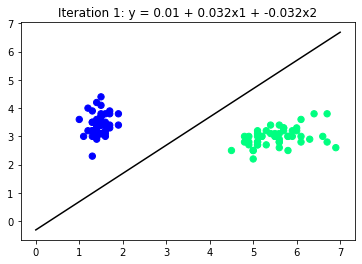

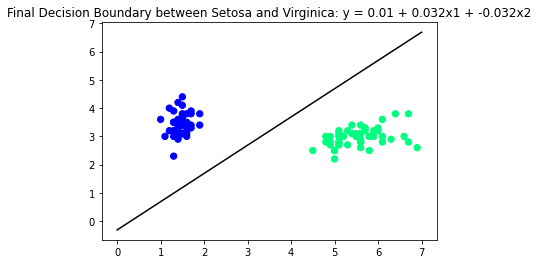

In [184]:
# train the perceptron until all the points are correctly classified and plot the decision boundary and the data points after each iteration
k = 1

while True:
    # initialize the count of correctly classified points
    count = 0
    # for each point
    for i in range(X31.shape[0]):
        # if the point is correctly classified
        if np.dot(W31.T, X31[i]) > 0:
            # increment the count
            count += 1
        # if the point is incorrectly classified
        else:
            # update the weights
            W31 += lr * X31[i]
    # if all the points are correctly classified
    if count == X31.shape[0]:
        # break the loop
        break
    # plot the decision boundary
    x = np.linspace(0, 7, 100)
    y = -(W31[0] + W31[1] * x) / W31[2]
    plt.plot(x, y, 'k-')
    # plot the data points
    plt.scatter(points31[:, 0], points31[:, 1], c=Y31, s=40, cmap='winter')
    plt.title("Iteration " + str(k) + ": y = " + str(-W31[0]) + " + " + str(W31[1]) + "x1 + " + str(W31[2]) + "x2")
    plt.show()
    k += 1

# plot the final decision boundary
x = np.linspace(0, 7, 100)
y = -(W31[0] + W31[1] * x) / W31[2]
plt.plot(x, y, 'k-')
# plot the data points
plt.scatter(points31[:, 0], points31[:, 1], c=Y31, s=40, cmap='winter')
plt.title("Final Decision Boundary between Setosa and Virginica: y = " + str(-W31[0]) + " + " + str(W31[1]) + "x1 + " + str(W31[2]) + "x2")
plt.show()

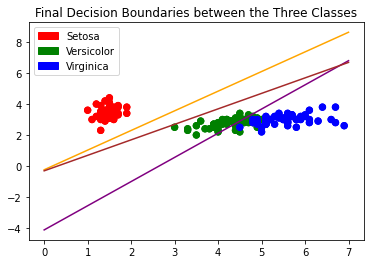

In [185]:
class_colors = ['red', 'green', 'blue']

line_colors = ['orange', 'purple', 'brown']

# plot the final decision boundaries and the data points using the above colors
x = np.linspace(0, 7, 100)
y = -(W12[0] + W12[1] * x) / W12[2]
plt.plot(x, y, line_colors[0])
x = np.linspace(0, 7, 100)
y = -(W23[0] + W23[1] * x) / W23[2]
plt.plot(x, y, line_colors[1])
x = np.linspace(0, 7, 100)
y = -(W31[0] + W31[1] * x) / W31[2]
plt.plot(x, y, line_colors[2])

# plot the data points for each class using the above colors in class_colors
plt.scatter(points12[:, 0], points12[:, 1], c=[class_colors[0]]*50 + [class_colors[1]]*50, s=40)
plt.scatter(points23[:, 0], points23[:, 1], c=[class_colors[1]]*50 + [class_colors[2]]*50, s=40)
plt.scatter(points31[:, 0], points31[:, 1], c=[class_colors[2]]*50 + [class_colors[0]]*50, s=40)

# plot the mpatches for each class using the above colors
red_patch = mpatches.Patch(color=class_colors[0], label='Setosa')
green_patch = mpatches.Patch(color=class_colors[1], label='Versicolor')
blue_patch = mpatches.Patch(color=class_colors[2], label='Virginica')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.title("Final Decision Boundaries between the Three Classes")
plt.show()


## **Support Vector Machine(SVM)**

Decision Boundary between Setosa and Versicolor


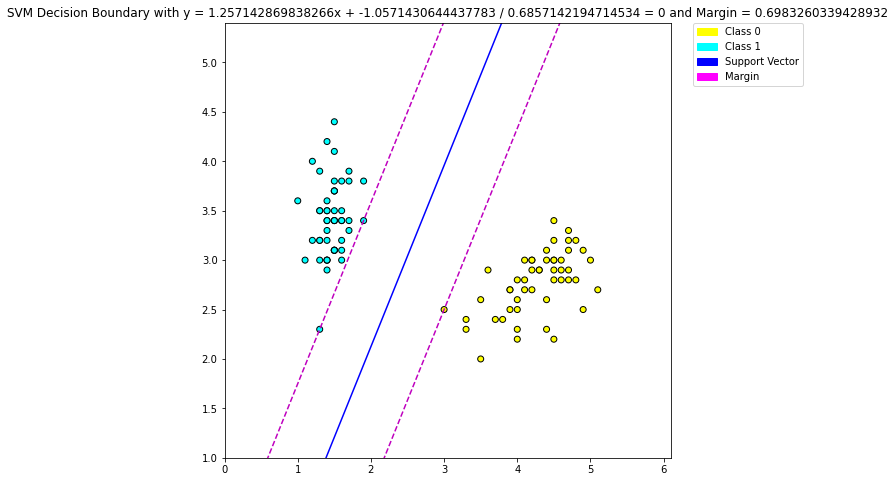

Decision Boundary between Versicolor and Virginica


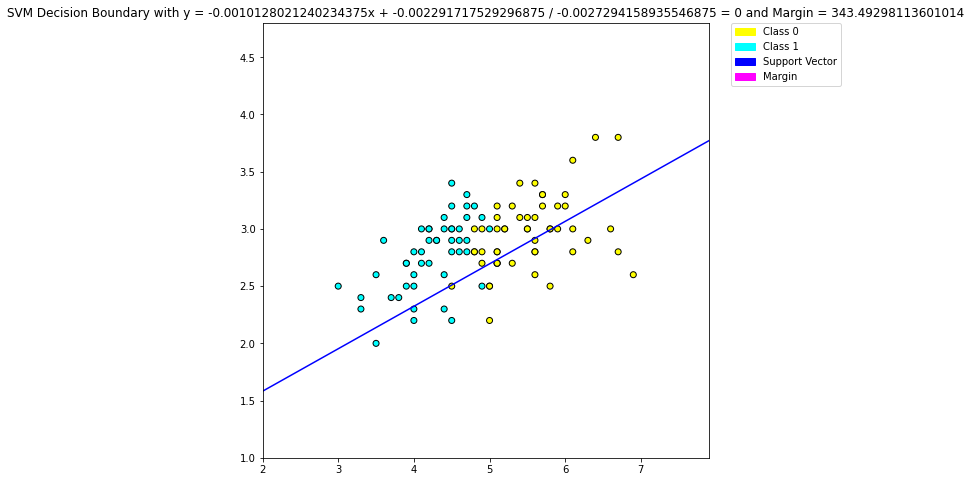

Decision Boundary between Setosa and Virginica


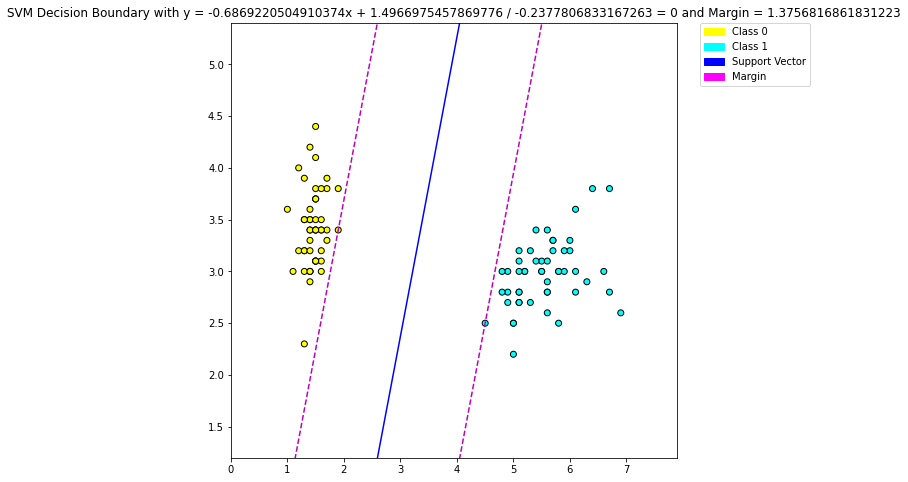

In [189]:
# use svm to classify the data points
X12 = points12
X23 = points23
X31 = points31

svm1 = SVM()
svm1.fit(X12, Y12)
svm2 = SVM()
svm2.fit(X23, Y23)
svm3 = SVM()
svm3.fit(X31, Y31)

print("Decision Boundary between Setosa and Versicolor")
svm1.plot_svm(X12, Y12)
print("Decision Boundary between Versicolor and Virginica")
svm2.plot_svm(X23, Y23)
print("Decision Boundary between Setosa and Virginica")
svm3.plot_svm(X31, Y31)

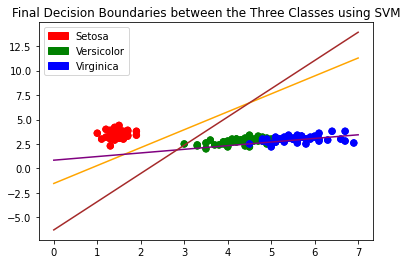

In [187]:
# plot the final decision boundaries and the data points using the above colors
x = np.linspace(0, 7, 100)
y = -(svm1.b + svm1.w[0] * x) / svm1.w[1]
plt.plot(x, y, line_colors[0])
x = np.linspace(0, 7, 100)
y = -(svm2.b + svm2.w[0] * x) / svm2.w[1]
plt.plot(x, y, line_colors[1])
x = np.linspace(0, 7, 100)
y = -(svm3.b + svm3.w[0] * x) / svm3.w[1]
plt.plot(x, y, line_colors[2])

# plot the data points for each class using the above colors in class_colors
plt.scatter(points12[:, 0], points12[:, 1], c=[class_colors[0]]*50 + [class_colors[1]]*50, s=40)
plt.scatter(points23[:, 0], points23[:, 1], c=[class_colors[1]]*50 + [class_colors[2]]*50, s=40)
plt.scatter(points31[:, 0], points31[:, 1], c=[class_colors[2]]*50 + [class_colors[0]]*50, s=40)

# plot the mpatches for each class using the above colors
red_patch = mpatches.Patch(color=class_colors[0], label='Setosa')
green_patch = mpatches.Patch(color=class_colors[1], label='Versicolor')
blue_patch = mpatches.Patch(color=class_colors[2], label='Virginica')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.title("Final Decision Boundaries between the Three Classes using SVM")
plt.show()